In [1]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.preprocessing.image as image
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.applications.vgg16 as vgg16
model=vgg16.VGG16(weights='imagenet',include_top=True)
model_summary=model.summary()
print(model_summary)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [3]:
print('利用tensorflow的keras自帶套件')
print('1-載入圖檔，並且進行尺寸調整')
img1=image.load_img('/content/drive/MyDrive/Colab第三階段202505/ch7_20250619/rabbit.jpg',target_size=(224,224))
img2=image.load_img('/content/drive/MyDrive/Colab第三階段202505/ch7_20250619/cat2new.jpg',target_size=(224,224))
img3=image.load_img('/content/drive/MyDrive/Colab第三階段202505/ch7_20250619/dog2.jpg',target_size=(224,224))
print('2-將圖檔轉換為numpy陣列')
img1a=image.img_to_array(img1)
img2a=image.img_to_array(img2)
img3a=image.img_to_array(img3)
print('3-多加入一維')
img1a=np.expand_dims(img1a,axis=0)
img2a=np.expand_dims(img2a,axis=0)
img3a=np.expand_dims(img3a,axis=0)

利用tensorflow的keras自帶套件
1-載入圖檔，並且進行尺寸調整
2-將圖檔轉換為numpy陣列
3-多加入一維


In [4]:
print('4-帶入VGG16進行預測')
print('查看一般圖檔形狀')
print(img1.__class__)
print(img1.size)
print(img2.size)
print(img3.size)
print('查看一般CNN的圖檔形狀')
print(img1a.shape)
print(img2a.shape)
print(img3a.shape)
print('VGG16之前版本會有自己格式，現在呢?')
img1b=vgg16.preprocess_input(img1a)
img2b=vgg16.preprocess_input(img2a)
img3b=vgg16.preprocess_input(img3a)
print(img1b.shape)
print(img2b.shape)
print(img3b.shape)

4-帶入VGG16進行預測
查看一般圖檔形狀
<class 'PIL.Image.Image'>
(224, 224)
(224, 224)
(224, 224)
查看一般CNN的圖檔形狀
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
VGG16之前版本會有自己格式，現在呢?
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [5]:
print('將圖檔帶入VGG16進行預測')
y_pred1=model.predict(img1a)
y_pred2=model.predict(img2a)
y_pred3=model.predict(img3a)
print('查看預測結果')
print(y_pred1.shape)
print(y_pred2.shape)
print(y_pred3.shape)
print('先跑第一張圖')
print(np.argmax(y_pred1))
print('再跑第二張圖')
print(np.argmax(y_pred2))
print('再跑第三張圖')
print(np.argmax(y_pred3))
print('號碼沒甚麼意義')
print(vgg16.decode_predictions(y_pred1,top=3))
print(vgg16.decode_predictions(y_pred2,top=3))
print(vgg16.decode_predictions(y_pred3,top=3))
print('進一步列出項目名稱與預測的機率')
tuple1=vgg16.decode_predictions(y_pred1,top=1)[0]
for i in range(len(tuple1)):
  print('名稱:',tuple1[i][1])
  print('機率:',tuple1[i][2])
tuple1=vgg16.decode_predictions(y_pred2,top=1)[0]
for i in range(len(tuple1)):
  print('名稱:',tuple1[i][1])
  print('機率:',tuple1[i][2])
tuple1=vgg16.decode_predictions(y_pred3,top=1)[0]
for i in range(len(tuple1)):
  print('名稱:',tuple1[i][1])
  print('機率:',tuple1[i][2])

將圖檔帶入VGG16進行預測
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
查看預測結果
(1, 1000)
(1, 1000)
(1, 1000)
先跑第一張圖
549
再跑第二張圖
290
再跑第三張圖
251
號碼沒甚麼意義
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[('n03291819', 'envelope', np.float32(0.2802328)), ('n06596364', 'comic_book', np.float32(0.24653102)), ('n03908618', 'pencil_box', np.float32(0.098635115))]]
[[('n02128925', 'jaguar', np.float32(0.95808184)), ('n02128385', 'leopard', np.float32(0.03133034)), ('n02128757', 'snow_leopard', np.float32(0.004104355))]]
[[('n02110341', 'dalmatian', np.float32(0.36347017)), ('n02109047', 'Great_Dane', np.float32(0.1821075)), ('n02093647', 'Bedlington_terrier', np.float32(0.14697683))]]
進一步列出項目名稱與預測的機率
名稱: envelope
機率: 0.2802328
名稱: jaguar
機率: 0.95808184
名稱: dalmatian
機率: 0.36347017


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
def predict_digit(model_path,image_path):
  model2=tf.keras.models.load_model(model_path)
  img=preprocess_img(image_path)
  print('模型進行預測')
  y_pred=model2.predict(img)
  print(y_pred.shape)
  print(y_pred)
  y_pred2=np.argmax(y_pred,axis=1)
  print('傳回去要傳回甚麼')
  return y_pred2

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def preprocess_img(image_path):
  img=Image.open(image_path)
  img=img.resize((28,28))
  img=img.convert('L') #代表灰階
  img=np.array(img)
  img=255-img
  print('將圖像特徵縮放在0到1之間')
  img=img/255
  print('轉換為CNN所需的規格，多加上一維')
  img=img.reshape(1,28,28,1)
  return img

In [8]:
model_path='/content/drive/MyDrive/Colab第三階段202505/ch7_20250619/minist_model.h5'
image_path='/content/drive/MyDrive/Colab第三階段202505/ch7_20250619/new.png'
y_pred2=predict_digit(model_path,image_path)
print(y_pred2)

將圖像特徵縮放在0到1之間
轉換為CNN所需的規格，多加上一維
模型進行預測
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
(1, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
傳回去要傳回甚麼
[1]


In [9]:
model2=tf.keras.models.load_model('/content/drive/MyDrive/Colab第三階段202505/ch7_20250619/minist_model.h5')
img=np.array([0,1,2,1,0,2,1,0,2,1])
y_pred2=np.array([0,2,2,1,0,0,1,1,2,1])

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('計算混淆矩陣')
print(img.shape)
print(y_pred2.shape)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(img,y_pred2)
print(cm)
print('計算準確率')
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(img,y_pred2)
print(accuracy)
wrong1=np.not_equal(img,y_pred2)
print(wrong1)
print(np.sum(wrong1))

計算混淆矩陣
(10,)
(10,)
[[2 1 0]
 [0 3 1]
 [1 0 2]]
計算準確率
0.7
[False  True False False False  True False  True False False]
3


In [11]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
from keras.utils import to_categorical
y_train_one_hot=to_categorical(y_train,num_classes=10)
y_test_one_hot=to_categorical(y_test,num_classes=10)
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


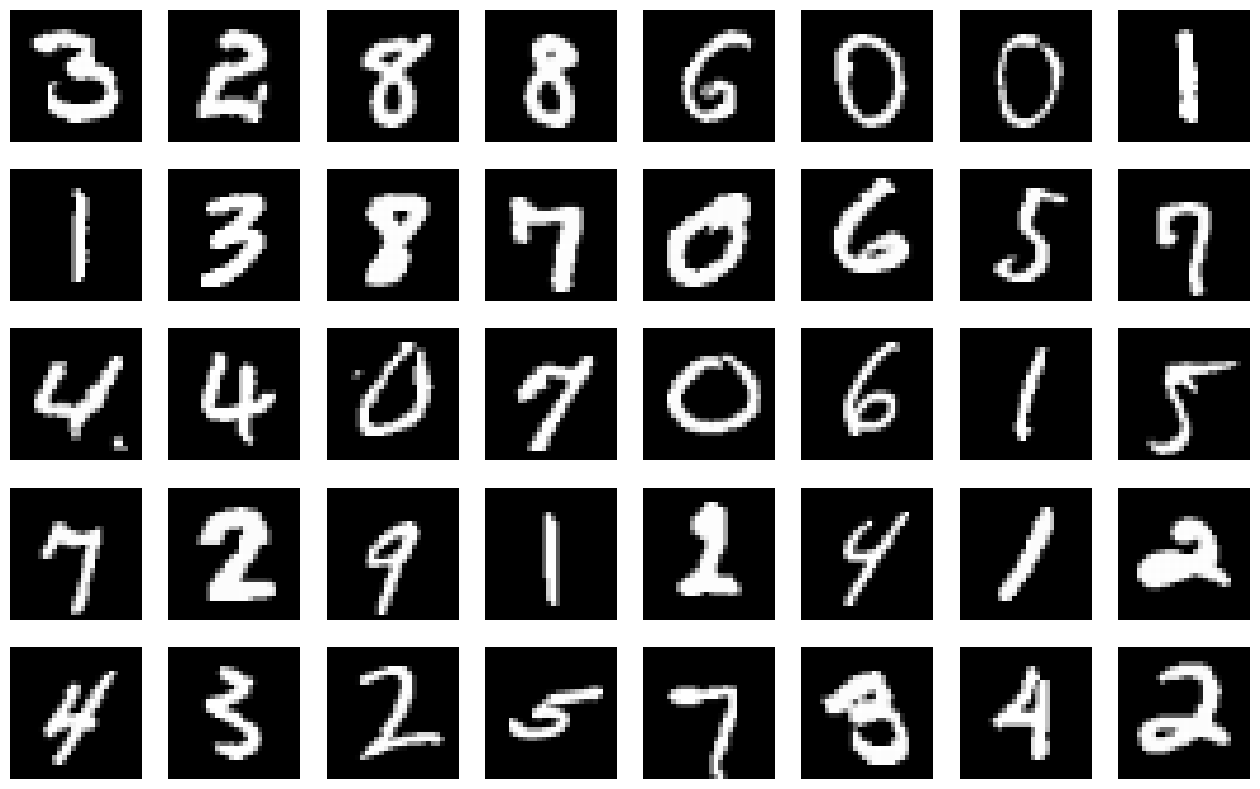

In [12]:
from random import randrange
plt.figure(figsize=(16,10),facecolor='white')
for i in range(5):
  for j in range(8):
    index=randrange(10000)
    plt.subplot(5,8,i*8+j+1)
    plt.axis('off')
    plt.imshow(x_test[index],cmap='gray')
plt.show()

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 140ms/step - accuracy: 0.8699 - loss: 4356.7559 - val_accuracy: 0.1158 - val_loss: 5.6296
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 143ms/step - accuracy: 0.1083 - loss: 3.1215 - val_accuracy: 0.1142 - val_loss: 2.5166
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 136ms/step - accuracy: 0.1106 - loss: 2.3167 - val_accuracy: 0.1142 - val_loss: 2.4998
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 135ms/step - accuracy: 0.1139 - loss: 2.3003 - val_accuracy: 0.1142 - val_loss: 2.5002
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 133ms/step - accuracy: 0.1117 - loss: 2.3010 - val_accuracy: 0.1142 - val_loss: 2.4875
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - accuracy: 0.1138 - loss: 2.3010 - val_accuracy: 0.1142 - val_loss: 2.4878
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.1140 - loss: 2.3008 - val_accuracy: 0.1142 - val_loss: 2.4878
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.1121 - loss

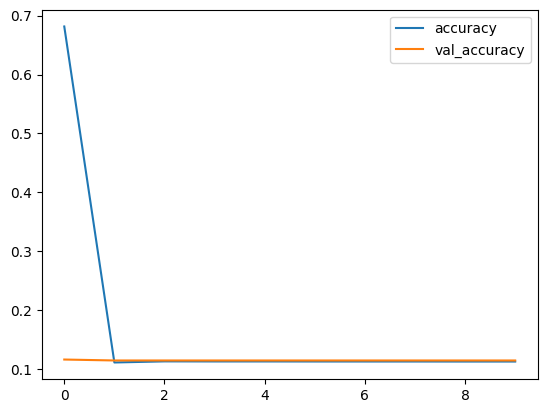

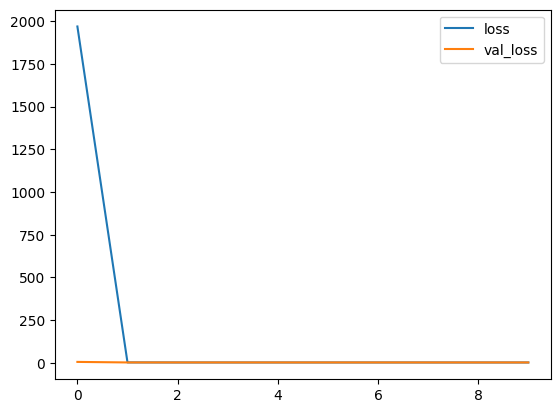

In [13]:
history=model2.fit(x_train,y_train_one_hot,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test_one_hot),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [14]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=40,kernel_size=(2,2),padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=40,kernel_size=(2,2),padding='same',activation='relu'))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 40)     │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 40)     │         6,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       784,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 817,230 (3.12 MB)

 Trainable params: 817,230 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.1136 - loss: 2.3012 - val_accuracy: 0.1142 - val_loss: 2.4594
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.1136 - loss: 2.3013 - val_accuracy: 0.1142 - val_loss: 2.4595
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.1105 - loss: 2.3016 - val_accuracy: 0.1142 - val_loss: 2.4594
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.1097 - loss: 2.3016 - val_accuracy: 0.1142 - val_loss: 2.4595
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 126ms/step - accuracy: 0.1137 - loss: 2.3012 - val_accuracy: 0.1142 - val_loss: 2.4594
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 130ms/step - accuracy: 0.1115 - loss: 2.3016 - val_accuracy: 0.1142 - val_loss: 2.4595
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 128ms/step - accuracy: 0.1104 - loss: 2.3014 - val_accuracy: 0.1142 - val_loss: 2.4595
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.1107 - loss: 2

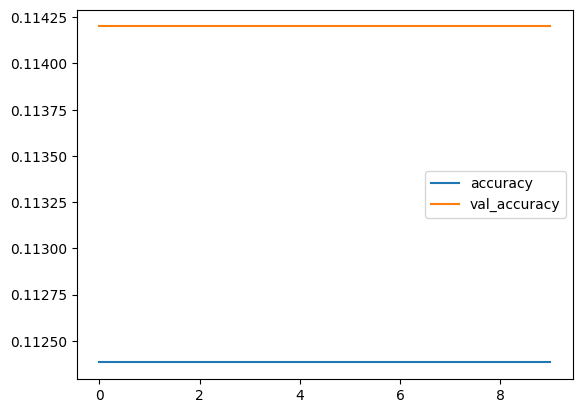

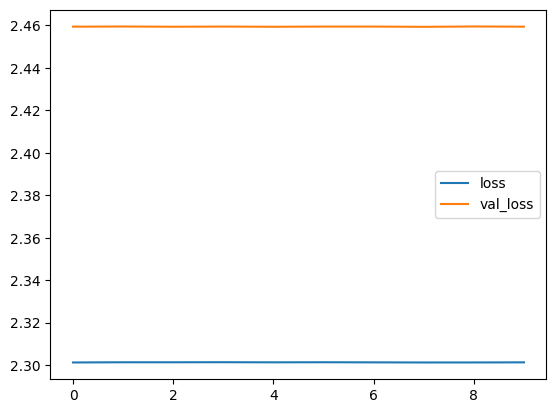

In [15]:
history=model2.fit(x_train,y_train_one_hot,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test_one_hot),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [16]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 135ms/step - accuracy: 0.1142 - loss: 2.3013 - val_accuracy: 0.1142 - val_loss: 2.4593
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 129ms/step - accuracy: 0.1126 - loss: 2.3012 - val_accuracy: 0.1142 - val_loss: 2.4594
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.1120 - loss: 2.3011 - val_accuracy: 0.1142 - val_loss: 2.4594
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.1111 - loss: 2.3131 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/step - accuracy: 0.1099 - loss: 2.3027 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 127ms/step - accuracy: 0.1125 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.1118 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.1120 - loss: 2

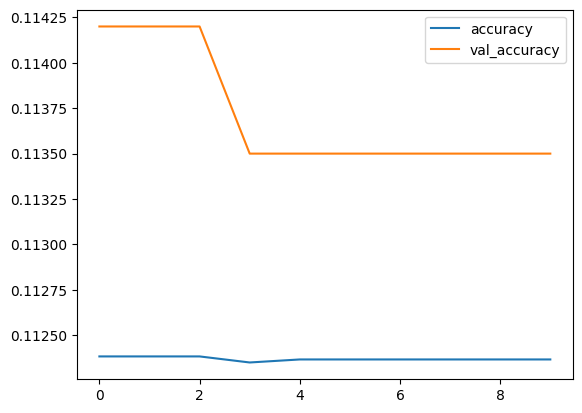

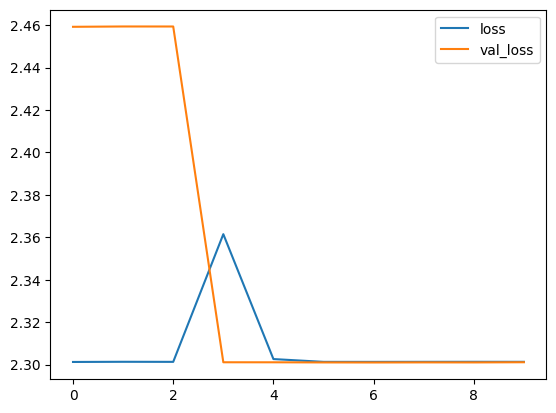

In [17]:
history=model2.fit(x_train,y_train_one_hot,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test_one_hot),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [18]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.1122 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 128ms/step - accuracy: 0.1130 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 130ms/step - accuracy: 0.1129 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.1128 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 145ms/step - accuracy: 0.1124 - loss: 2.3010 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 140ms/step - accuracy: 0.1134 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 128ms/step - accuracy: 0.1109 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 130ms/step - accuracy: 0.1131 - loss: 2

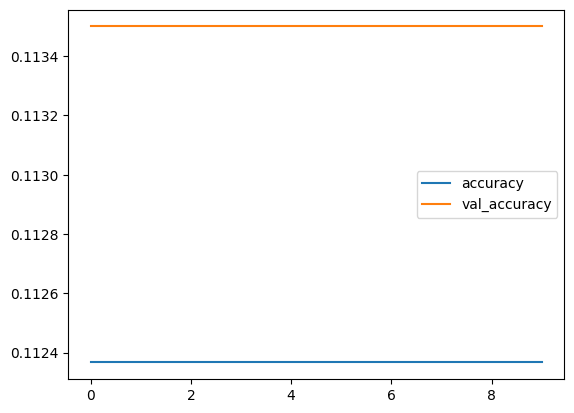

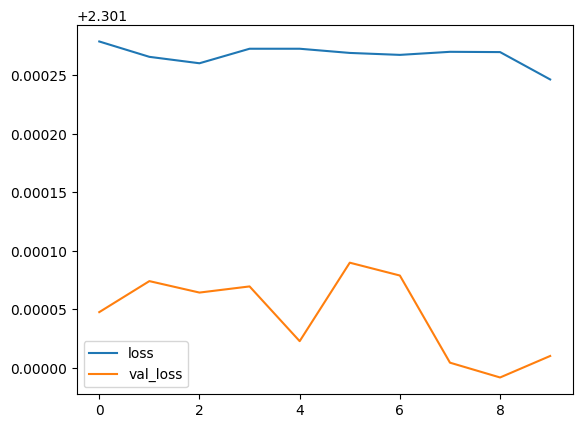

In [19]:
history=model2.fit(x_train,y_train_one_hot,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test_one_hot),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('針對測試資料進行驗證')
score=model.evaluate(x_test,y_test,verbose=1)
print('測試資料的 loss:',score[0])
print('測試資料的 accuracy:',score[1])
print('模型儲存')
model.save('minist_model.h5')

針對測試資料進行驗證
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0954 - loss: 23.9239


測試資料的 loss: 23.944272994995117
測試資料的 accuracy: 0.09309999644756317
模型儲存
